In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
# Load the data

df = pd.read_csv('E:/Upgrad DS/Machine_Learning/Logistic_Regression_Proejct/Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
# understand shape, datatypes


print("shape:", df.shape)

print(df.info())

print(df['Outcome'].value_counts())

df.describe()

shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols:
    print(c, (df[c] == 0).sum())


Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [19]:
cols_with_zero_as_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer(strategy='median')  # median is robust to outliers
df[cols_with_zero_as_missing] = imputer.fit_transform(df[cols_with_zero_as_missing])


AttributeError: module 'matplotlib.pyplot' has no attribute 'sho'

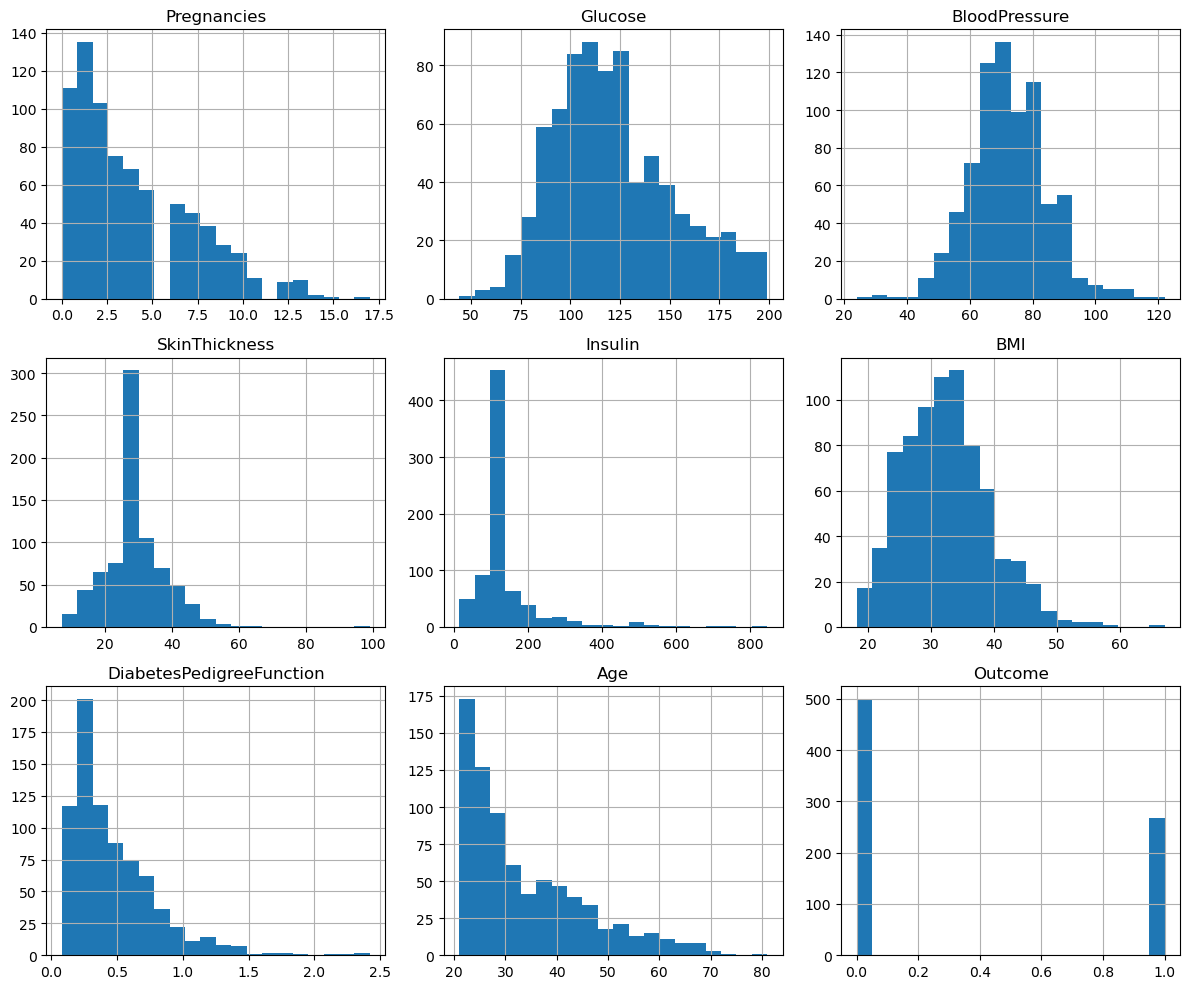

In [20]:
# Visual EDA (distribution and correleation)

# Histogram 

df.hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.sho()

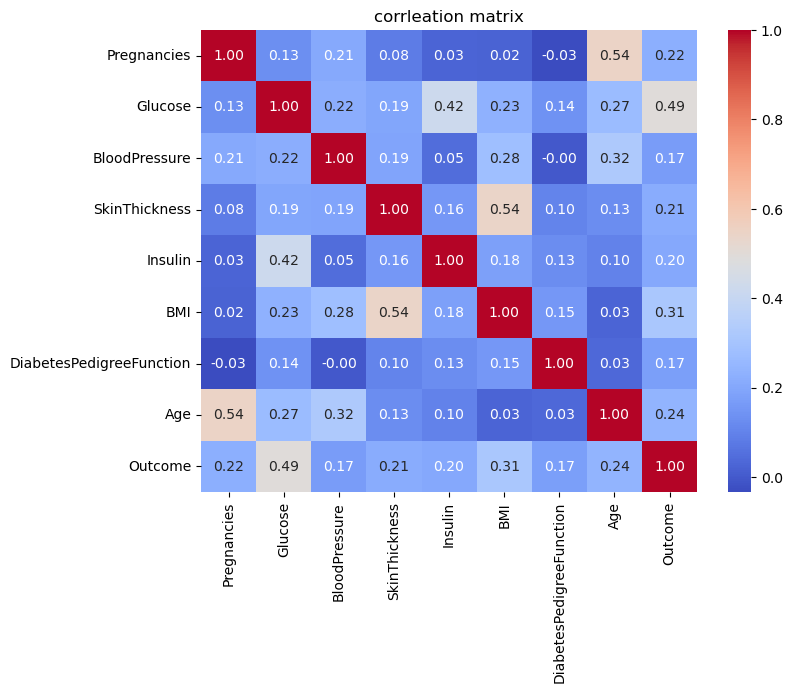

In [22]:
# corrlelation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap='coolwarm')
plt.title('corrleation matrix')
plt.show(_)

In [24]:
# Feature / target split and scaling

X = df.drop('Outcome' , axis = 1)
y = df['Outcome']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [28]:
len(X_train), len(X_test), len(y_train), len(y_test)

(614, 154, 614, 154)

In [29]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Scale features (standardization)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# train Logistic Regression 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             average_precision_score)

In [37]:
lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))


              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

ROC AUC: 0.8128


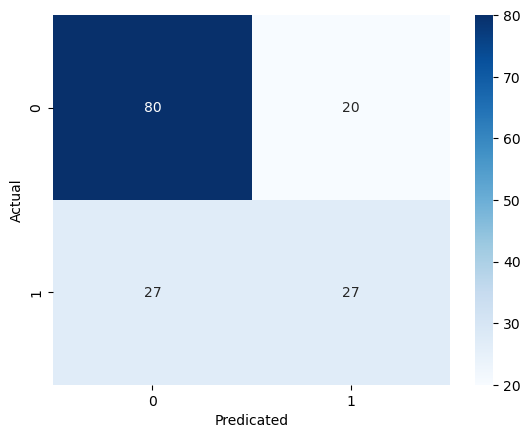

In [39]:
# Evaluate with confusion matrix + ROC + Precision Recall

# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicated');plt.ylabel('Actual')
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
# Hyperparameter tuning

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=2000, solver='liblinear', random_state=42),
                    param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_scaled, y_train)
print("Best params:", grid.best_params_)
best_lr = grid.best_estimator_

# Evaluate
y_pred_best = best_lr.predict(X_test_scaled)
y_proba_best = best_lr.predict_proba(X_test_scaled)[:,1]
print(classification_report(y_test, y_pred_best))
print("ROC AUC (best):", round(roc_auc_score(y_test, y_proba_best),4))


Best params: {'C': 1}
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

ROC AUC (best): 0.8128


In [48]:
#  predict a binary outcome (like having diabetes or not)

lr_w = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42)
lr_w.fit(X_train_scaled, y_train)
print("ROC AUC (class_weight):", roc_auc_score(y_test, lr_w.predict_proba(X_test_scaled)[:,1]))


ROC AUC (class_weight): 0.8125925925925926


In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)
print("After SMOTE:", np.bincount(y_res))
lr_sm = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
lr_sm.fit(X_res, y_res)
print("ROC AUC (SMOTE):", roc_auc_score(y_test, lr_sm.predict_proba(X_test_scaled)[:,1]))


After SMOTE: [400 400]
ROC AUC (SMOTE): 0.8112962962962964


In [50]:
coef = best_lr.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'feature': features, 'coefficient': coef})
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
coef_df.sort_values(by='odds_ratio', ascending=False, inplace=True)
coef_df


,feature,coefficient,odds_ratio
1,Glucose,1.180614,3.256372
5,BMI,0.687247,1.988234
0,Pregnancies,0.376536,1.457228
6,DiabetesPedigreeFunction,0.233195,1.262627
7,Age,0.147300,1.158702
3,SkinThickness,0.027302,1.027678
2,BloodPressure,-0.043986,0.956967
4,Insulin,-0.066171,0.935971


odds_ratio > 1 means higher value increases odds of diabetes; < 1 means decreases odds. This gives clinical intuition (e.g., higher glucose → higher odds).

In [51]:
# Example: find threshold with recall >= 0.8 and max precision
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_best)
df_pr = pd.DataFrame({'precision': precisions[:-1], 'recall': recalls[:-1], 'threshold': thresholds})
df_pr[df_pr.recall >= 0.8].sort_values('precision', ascending=False).head(3)


,precision,recall,threshold
77,0.584416,0.833333,0.290601
75,0.582278,0.851852,0.279995
78,0.578947,0.814815,0.291130


In [53]:
import joblib

In [54]:
joblib.dump({'model': best_lr, 'scaler': scaler}, 'pima_logistic_model.pkl')
# Load later:
# obj = joblib.load('pima_logistic_model.pkl')
# model = obj['model']; scaler = obj['scaler']


['pima_logistic_model.pkl']

In [55]:
# Example patient (values in the order of X.columns)
sample = pd.DataFrame([{
  'Pregnancies': 2, 'Glucose': 120, 'BloodPressure': 70, 'SkinThickness': 20,
  'Insulin': 79, 'BMI': 25.0, 'DiabetesPedigreeFunction': 0.5, 'Age': 27
}])

sample_scaled = scaler.transform(sample)
prob = best_lr.predict_proba(sample_scaled)[:,1][0]
print(f"Predicted diabetes probability: {prob:.3f}")


Predicted diabetes probability: 0.128
